In [ ]:
import json
import pandas as pd
from collections import defaultdict

with open("../data/raw/projetos_pbl_programacao_python.json", "r", encoding="utf-8") as f:
    dados = json.load(f)

len(dados)


FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/projetos_pbl_programacao_python.json'

In [12]:
pbl_to_los_m1 = {}

for projeto in dados:
    nome = projeto["nome_do_projeto"]
    los = projeto["unidades_de_conhecimento_utilizadas"]
    pbl_to_los_m1[nome] = los

pbl_to_los_m1


{'Agente no Mundo do Grelha (Gridworld)': ['MDPs',
  'Estados',
  'Ações',
  'Recompensas',
  'Políticas',
  'Função de Valor'],
 'Iteração de Valor e Política no FrozenLake': ['Iteração de Valor',
  'Iteração de Política',
  'Equação de Bellman',
  'Convergência',
  'OpenAI Gym (Básico)'],
 'Q-Learning para o Caçador de Tesouros': ['Q-Learning',
  'Exploração-Explotação (epsilon-greedy)',
  'Tabela Q',
  'Atualização Temporal (TD)',
  'Taxa de Aprendizagem'],
 'SARSA no Ambiente Taxi-v3': ['SARSA',
  'On-policy',
  'Off-policy',
  'OpenAI Gym',
  'TD(0)'],
 'Criação de Ambiente Personalizado e Comparação de Algoritmos Tabulares': ['Design de Ambientes',
  'Representação de Estados e Ações',
  'Comparação de Algoritmos',
  'Escalabilidade'],
 'DQN para CarPole-v1': ['DQN',
  'Redes Neurais',
  'Replay Buffer',
  'Rede Alvo',
  'Experiência Replay',
  'CarPole-v1'],
 'Policy Gradient para Acrobot-v1': ['Policy Gradient',
  'REINFORCE',
  'Monte Carlo',
  'Política Estocástica',
  'Acrob

In [13]:
# Quantos LOs cada PBL usa (presença), um PBL mais avançado usa mais objetivos?

df = pd.read_csv("data/processed/LO_PBL_aprendizado_por_reforco.csv")

# transformar em binário (presença)
matriz_binaria = (df.iloc[:, 1:] > 0).astype(int)

# contar LOs por PBL (somar por coluna)
pbl_counts = matriz_binaria.sum(axis=0)

df_pbl_presenca = pd.DataFrame({
    "PBL": pbl_counts.index,
    "#LOs": pbl_counts.values
})

df_pbl_presenca.sort_values("#LOs")


,PBL,#LOs
0,Agente no Mundo do Grelha (Gridworld),5
1,Iteração de Valor e Política no FrozenLake,5
2,Q-Learning para o Caçador de Tesouros,5
3,SARSA no Ambiente Taxi-v3,5
4,Criação de Ambiente Personalizado e Comparação...,5
5,DQN para CarPole-v1,5
6,Policy Gradient para Acrobot-v1,5
7,Actor-Critic para BipedalWalker-v3 (versão dis...,5
8,Estratégias de Exploração Avançadas em Mountai...,5
9,DQN Duplo e Dueling para Ambientes Atari (Pong...,5


In [14]:
complexidade_ponderada = df.iloc[:, 1:].sum(axis=0)

df_complexidade = pd.DataFrame({
    "PBL": complexidade_ponderada.index,
    "Complexidade_total": complexidade_ponderada.values
})

df_complexidade.sort_values("Complexidade_total")


,PBL,Complexidade_total
0,Agente no Mundo do Grelha (Gridworld),15
1,Iteração de Valor e Política no FrozenLake,15
2,Q-Learning para o Caçador de Tesouros,15
3,SARSA no Ambiente Taxi-v3,15
4,Criação de Ambiente Personalizado e Comparação...,15
5,DQN para CarPole-v1,15
6,Policy Gradient para Acrobot-v1,15
7,Actor-Critic para BipedalWalker-v3 (versão dis...,15
8,Estratégias de Exploração Avançadas em Mountai...,15
9,DQN Duplo e Dueling para Ambientes Atari (Pong...,15


In [19]:
df_bin = (df.iloc[:, 1:] > 0).astype(int)

df_bin



,Agente no Mundo do Grelha (Gridworld),Iteração de Valor e Política no FrozenLake,Q-Learning para o Caçador de Tesouros,SARSA no Ambiente Taxi-v3,Criação de Ambiente Personalizado e Comparação de Algoritmos Tabulares,DQN para CarPole-v1,Policy Gradient para Acrobot-v1,Actor-Critic para BipedalWalker-v3 (versão discreta simplificada),Estratégias de Exploração Avançadas em MountainCar,DQN Duplo e Dueling para Ambientes Atari (Pong ou Breakout),DDPG/TD3 para Controle Contínuo (HalfCheetah-v3),Aprendizado Baseado em Modelo com Dyna-Q,Aprendizado por Reforço Multiagente (MARL) em um Cenário de Cooperação/Competição,Aprendizado por Reforço Hierárquico (HRL) para Tarefas Complexas,Aplicação de RL em um Problema do Mundo Real (Sugestão/Pesquisa)
0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1
2,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0
3,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0
5,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0
6,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
9,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [24]:
pbls = df.columns[1:]

bloco_inicial = pbls[:5]
bloco_intermediario = pbls[5:10]
bloco_final = pbls[10:]

df_bin[bloco_inicial].sum(axis=1)
df_bin[bloco_intermediario].sum(axis=1)
df_bin[bloco_final].sum(axis=1)







0     5
1     5
2     1
3     1
4     0
5     2
6     2
7     0
8     1
9     0
10    3
11    1
12    0
13    1
14    3
dtype: int64

In [25]:
df_bin[bloco_inicial].sum(axis=1)



0     5
1     5
2     4
3     3
4     3
5     1
6     3
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    0
dtype: int64

In [26]:
df_bin[bloco_intermediario].sum(axis=1)


0     4
1     3
2     1
3     0
4     3
5     2
6     3
7     0
8     2
9     2
10    3
11    0
12    2
13    0
14    0
dtype: int64

In [27]:
df_bin[bloco_final].sum(axis=1)


0     5
1     5
2     1
3     1
4     0
5     2
6     2
7     0
8     1
9     0
10    3
11    1
12    0
13    1
14    3
dtype: int64

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.3 MB 6.1 MB/s eta 0:00:02
   ----------------- ---------------------- 3.7/8.3 MB 9.4 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.3 MB 12.1 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.3 MB 12.7 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 8.5 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 11.1 MB/s  0:00:00

   ---------------------------------------- 0/5 [kiwisolver]
   ---------------------------------------- 0/5 [kiwisolver]
   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [

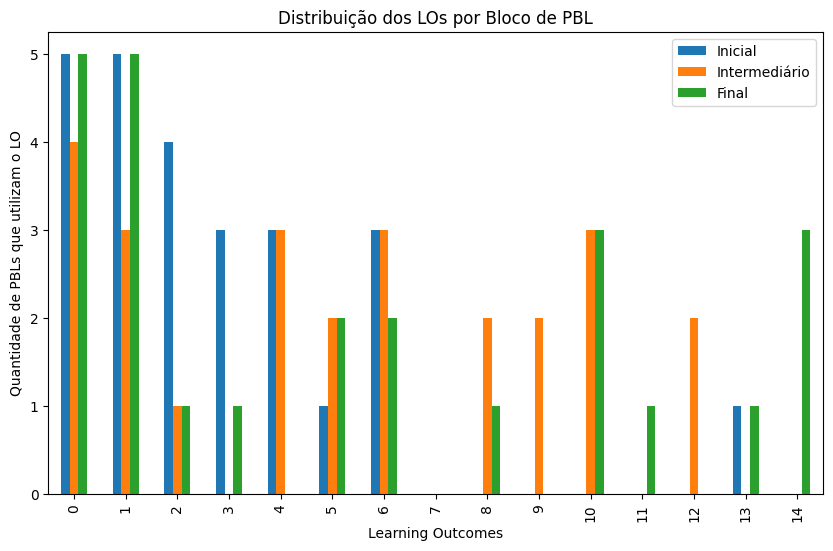

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

blocos = {
    "Inicial": df_bin[bloco_inicial].sum(axis=1),
    "Intermediário": df_bin[bloco_intermediario].sum(axis=1),
    "Final": df_bin[bloco_final].sum(axis=1)
}

df_blocos = pd.DataFrame(blocos)

df_blocos.plot(kind="bar", figsize=(10,6))
plt.xlabel("Learning Objective ID")
plt.ylabel("Quantidade de PBLs que utilizam o LO")
plt.title("Distribuição dos LOs por Bloco de PBL")
plt.show()
